<a href="https://colab.research.google.com/github/JoyBis48/Digit_Recogniser/blob/main/Handwritten_Digit_Recogniser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11501568/11490434 [==============================] - 0s 0us/step


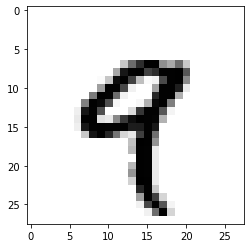

In [ ]:
import tensorflow as tf

hwd = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test)= hwd.load_data() #splitting the dataset into training and test sets

import matplotlib.pyplot as plt
plt.imshow(x_train[4],cmap=plt.cm.binary)



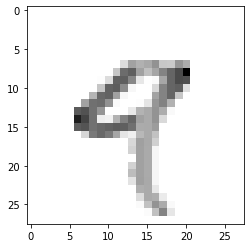

In [ ]:
x_train = tf.keras.utils.normalize(x_train,axis=1) #normalizing the data
x_test = tf.keras.utils.normalize(x_test,axis=1) #normalizing the data

plt.imshow(x_train[4],cmap =plt.cm.binary)

In [ ]:
import numpy as np
img_size = 28
x_trainr = np.array(x_train).reshape(-1,img_size,img_size,1)  #increasing dimension by one for kernel operation
x_testr = np.array(x_test).reshape(-1,img_size,img_size,1)  #increasing dimension by one for kernel operation


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Activation, MaxPooling2D

#Now creating the neural network

# First Convolutional Layer 

model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Second Convolutional Layer

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Third Convolutional Layer

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully connected layer 1

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#Fully connected layer 2

model.add(Dense(32))
model.add(Activation("relu"))

#Last fully connected layer, with output containing values equal to number of classes 10(0-9)
model.add(Dense(10))
model.add(Activation("softmax"))

model.summary()














Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [ ]:
#compiling before training
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
model.fit(x_trainr,y_train,epochs=4,validation_split=0.3) #training the model

Epoch 1/4
1313/1313 [==============================] - 75s 57ms/step - loss: 0.3237 - accuracy: 0.9009 - val_loss: 0.1549 - val_accuracy: 0.9538
Epoch 2/4
1313/1313 [==============================] - 73s 56ms/step - loss: 0.1071 - accuracy: 0.9676 - val_loss: 0.1066 - val_accuracy: 0.9678
Epoch 3/4
1313/1313 [==============================] - 72s 55ms/step - loss: 0.0774 - accuracy: 0.9765 - val_loss: 0.1033 - val_accuracy: 0.9687
Epoch 4/4
1313/1313 [==============================] - 73s 56ms/step - loss: 0.0604 - accuracy: 0.9811 - val_loss: 0.0734 - val_accuracy: 0.9775


In [ ]:
#checking testing dataset
test_loss,test_acc = model.evaluate(x_testr,y_test)
print("validation accuracy ->",test_acc)
print("test loss on the test samples ->",test_loss)



313/313 [==============================] - 4s 14ms/step - loss: 0.0729 - accuracy: 0.9798
validation accuracy -> 0.9797999858856201
test loss on the test samples -> 0.07288185507059097


4


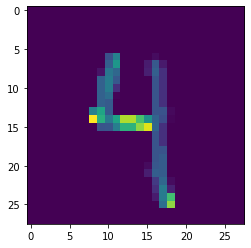

In [ ]:
prediction = model.predict([x_testr])
plt.imshow(x_test[4893])
print(np.argmax(prediction[4893]))  #argmax will return the max value index from the softmax class probabilities 

In [ ]:
import cv2
img = cv2.imread("/Six.png") #reading a handwritten digit uploaded from the local device

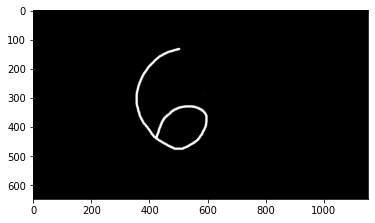

In [ ]:
plt.imshow(img)

In [ ]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [ ]:
resized = cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA) 

In [ ]:
norimg = tf.keras.utils.normalize(resized,axis=1) # scaling from 0 to 1

In [ ]:
norimg=np.array(norimg).reshape(-1,img_size,img_size,1) #kernel operation of convolution layer

In [ ]:
prediction = model.predict(norimg)
print(np.argmax(prediction)) #printing the predicted digit 

6
